In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set()

## Q1

Load the data from ‘ex1data1.txt’. The first column is the population of a city and the
second column is the profit of a food truck in that city. A negative value for profit
indicates a loss

In [48]:
df = pd.read_table('./datasets/ex1data1.txt', sep=",", names=['Population', 'Profit'])
df.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


#### a. Visualize the data using the appropriate plot.

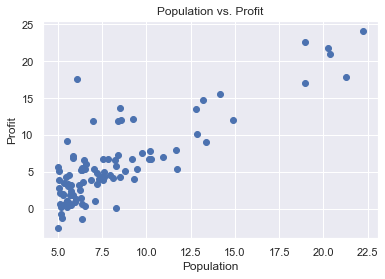

In [16]:
plt.scatter(df.Population, df.Profit)

plt.xlabel('Population')
plt.ylabel('Profit')
plt.title('Population vs. Profit')

plt.show()

#### b. Print the description of the data.


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Population  97 non-null     float64
 1   Profit      97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


#### c. Check if attributes have a linear relationship, and apply the Linear Regression model. (Train/Test split = 80/20)

In [21]:
X = df.drop(['Profit'], axis=1)
y = df.Profit

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [32]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [33]:
reg.fit(X_train, y_train)

LinearRegression()

In [34]:
y_pred = reg.predict(X_test)

In [35]:
reg.score(X_test, y_test)

0.7208154017953732

In [37]:
reg.coef_

array([1.22220802])

In [38]:
reg.intercept_

-4.314934514518108

In [40]:
print(f'y = {reg.coef_[0]}x + ({reg.intercept_})')

y = 1.2222080197692473x + (-4.314934514518108)


## Q2

Load the data from ‘ex1data2.txt’ contains a training set of housing prices in Portland, Oregon. The first column is the size of the house (in square feet), the second column is the number of bedrooms, and the third column is the price of the house.

In [49]:
df = pd.read_table('./datasets/ex2data1.txt', sep=",", names=['size', 'bedrooms', 'price'])
df.head()

,size,bedrooms,price
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


#### a. Print the description of the data.


In [51]:
df.describe()

,size,bedrooms,price
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


#### b. Apply the Linear Regression model. (Train/Test split = 80/20)


In [52]:
X = df.drop(['price'], axis=1)
y = df.price

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [56]:
reg.fit(X_train, y_train)

LinearRegression()

#### c. Find and print the regression parameters.


In [58]:
print(f'y = {reg.coef_[0]} * x1 + {reg.coef_[1]} * x2 + ({reg.intercept_})')

y = 0.015981513268614855 * x1 + 0.013024853034574952 * x2 + (-1.3283092360466782)


#### d. Find the goodness of the model using R2


In [59]:
y_pred = reg.predict(X_test)

In [61]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.49507543910358076

#### e. Compute MSE for the instances in the test set.


In [65]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_pred, y_test)
print(mse)

0.12118189461514065


## Q3

Load the data from ‘canada_per_capita_income.csv’. Use this to build a regression model and predict the per capita income for Canadian citizens in the year 2020. Predict Canada’s per capita income in the year 2020. (Expected Output - 41288.69409442)

In [71]:
df = pd.read_csv('./datasets/canada_per_capita_income.csv', names=['year', 'income'])
df.head()

,year,income
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


In [72]:
X = df.drop(['income'], axis=1)
y = df.income

In [73]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X, y)

In [77]:
reg.predict([[2020]])

C:\Users\Maitray\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([41288.69409442])

## Q4

Suppose that you are the administrator of a university department and you want to determine each applicant’s chance of admission based on their results on two exams. You have historical data (“ex2data1.txt”) from previous applicants that you can use as a training set for logistic regression. For each training example, you have the applicant’s scores on two exams and the admissions decision. Your task is to build a classification model that estimates an applicant’s probability of admission based the scores from those two exams.

In [3]:
df = pd.read_table('./datasets/ex2data1.txt', names=['a', 'b', 'passed'], sep=',')
df.head()

,a,b,passed
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [4]:
X = df.drop(['passed'], axis=1)
y = df.passed

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [84]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()

In [85]:
log.fit(X_train, y_train)

LogisticRegression()

In [86]:
log.score(X_test, y_test)

0.8

In [87]:
y_pred = log.predict(X_test)

In [88]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[7, 1],
       [3, 9]], dtype=int64)

## Q5

Load the data from ‘HR_comma_sep.csv’. Use this to build a logistic regression model and compute the accuracy of model.

In [36]:
df = pd.read_csv('./datasets/HR_comma_sep.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [38]:
depts, salaries = pd.get_dummies(df.Department), pd.get_dummies(df.salary)

df.drop(['Department', 'salary'], inplace=True, axis=1)

df = pd.concat((df, depts, salaries), axis=1)
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,IT,RandD,...,hr,management,marketing,product_mng,sales,support,technical,high,low,medium
0,0.38,0.53,2,157,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [62]:
X = df.drop(['left'], axis=1)
y = df.left

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [67]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(max_iter=3000)

In [68]:
log.fit(X_train, y_train)

LogisticRegression(max_iter=3000)

In [69]:
log.score(X_test, y_test)

0.793

## Q6

Load the data from ‘Naive-Bayes-Classification-Data.csv’. Use this to build a Naïve Bayes classifier and compute the accuracy of model.

https://heartbeat.comet.ml/naive-bayes-classifier-in-python-using-scikit-learn13c4deb83bcf

In [70]:
df = pd.read_csv("./heart.csv")
df.head()

,glucose,bloodpressure,diabetes
0,40,85,0
1,40,92,0
2,45,63,1
3,45,80,0
4,40,73,1


In [71]:
X = df.drop('diabetes', axis=1)
y = df.diabetes

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [73]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB().fit(X_train, y_train)

In [75]:
gnb.score(X_test, y_test)

0.9396984924623115

## Q7

Load Iris data-set. Use this to build a Naïve Bayes classifier and find the accuracy of the model.

In [74]:
from sklearn.datasets import load_iris
iris_data = load_iris()

In [75]:
iris_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [76]:
iris = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
iris['species'] = iris_data.target

iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [128]:
X = iris.drop('species', axis=1)
y = iris.species

In [133]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [134]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [135]:
gnb.fit(X_train, y_train)

GaussianNB()

In [136]:
gnb.score(X_test, y_test)

0.9666666666666667

In [137]:
y_pred = gnb.predict(X_test)

In [138]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
cm

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]], dtype=int64)

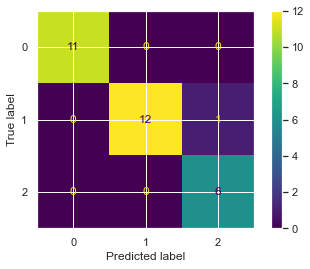

In [139]:
ConfusionMatrixDisplay(cm).plot()
plt.show()

## Q9

Load Iris data-set. Use this to build a SVM classifier and find the accuracy of the model.

In [140]:
from sklearn.svm import SVC
svc = SVC()

In [141]:
svc.fit(X_train, y_train)

SVC()

In [142]:
svc.score(X_test, y_test)

0.9666666666666667

In [143]:
y_pred = svc.predict(X_test)

In [144]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]], dtype=int64)

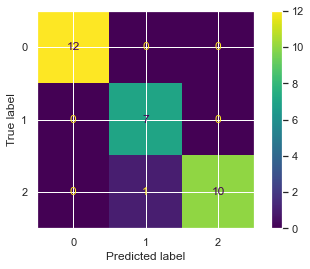

In [110]:
ConfusionMatrixDisplay(cm).plot()
plt.show()

## Q8

Load Breast Cancer Wisconsin (Diagnostic) data-set. Use this to build a SVM classifier and find the accuracy of this model

In [111]:
from sklearn.datasets import load_breast_cancer
cancer_data = load_breast_cancer()

In [113]:
df = pd.DataFrame(cancer_data.data, columns = cancer_data.feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [115]:
df['type'] = cancer_data.target

In [117]:
X = df.drop('type', axis=1)
y = df.type

In [119]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [120]:
from sklearn.svm import SVC
svc = SVC()

In [121]:
svc.fit(X_train, y_train)

SVC()

In [122]:
svc.score(X_test, y_test)

0.9298245614035088

In [123]:
y_pred = svc.predict(X_test)

In [125]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[35,  7],
       [ 1, 71]], dtype=int64)

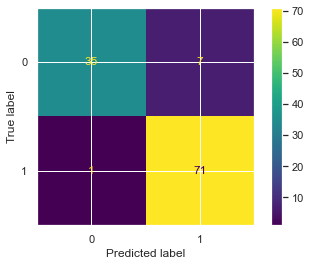

In [126]:
ConfusionMatrixDisplay(cm).plot()
plt.show()

## Q10

Load the data from Iris data-set. Use this to build a Decision Tree model and compute the accuracy of the model.

In [145]:
X = iris.drop('species', axis=1)
y = iris.species

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [153]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
dtc = DecisionTreeClassifier()

In [154]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [155]:
dtc.score(X_test, y_test)

0.8666666666666667

In [156]:
y_pred = dtc.predict(X_test)

In [157]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[10,  0,  0],
       [ 0,  6,  1],
       [ 0,  3, 10]], dtype=int64)

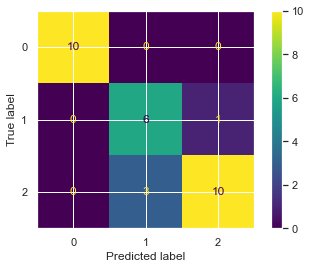

In [162]:
ConfusionMatrixDisplay(cm).plot()
plt.show()

In [ ]:
fig = plt.figure(figsize=(20, 10))
plot_tree(dtc, filled=True)
plt.show()

## Q11

Load the data from Titanic data-set. Use this to build a Decision Tree model and compute the accuracy.

In [55]:
df = pd.read_csv('./datasets/titanic.csv')
df.head()

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [56]:
df.isna().sum()

PassengerId      0
Name             0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Survived         0
dtype: int64

In [57]:
df.Age.fillna(df.Age.mean(), inplace=True)
df.dropna(subset=['Embarked'], axis=0, inplace=True)
df.drop('Cabin', inplace=True, axis=1)

df.isna().sum()

PassengerId    0
Name           0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Survived       0
dtype: int64

In [58]:
sex, embarked = pd.get_dummies(df.Sex), pd.get_dummies(df.Embarked)

df.drop(['Sex', 'Embarked'], inplace=True, axis=1)
df = pd.concat((df, sex, embarked), axis=1)

df.head()

,PassengerId,Name,Pclass,Age,SibSp,Parch,Ticket,Fare,Survived,female,male,C,Q,S
0,1,"Braund, Mr. Owen Harris",3,22.0,1,0,A/5 21171,7.2500,0,0,1,0,0,1
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1,1,0,1,0,0
2,3,"Heikkinen, Miss. Laina",3,26.0,0,0,STON/O2. 3101282,7.9250,1,1,0,0,0,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,1,1,0,0,0,1
4,5,"Allen, Mr. William Henry",3,35.0,0,0,373450,8.0500,0,0,1,0,0,1


In [59]:
X = df.drop(['PassengerId', 'Name', 'Ticket', 'Survived'], axis=1)
y = df.Survived

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [66]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
dtc = DecisionTreeClassifier().fit(X_train, y_train)

In [67]:
dtc.score(X_test, y_test)

0.8258426966292135

In [68]:
y_pred = dtc.predict(X_test)

In [69]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
cm

array([[94, 19],
       [12, 53]], dtype=int64)

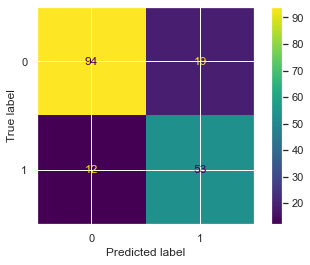

In [70]:
ConfusionMatrixDisplay(cm).plot()
plt.show()

In [5]:
##Q12

import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the Titanic dataset
titanic = fetch_openml(name='titanic', version=1)
data = pd.DataFrame(titanic.data, columns=titanic.feature_names)
target = pd.Series(titanic.target)

# Convert non-numeric data to numeric values
data['sex'] = pd.factorize(data['sex'])[0]
data['embarked'] = pd.factorize(data['embarked'])[0]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=0)

# Build a kNN classifier with k=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Compute the accuracy of the model on the testing set
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


ValueError: could not convert string to float: 'Peltomaki, Mr. Nikolai Johannes'

## Q13

Load Iris data-set. Use this to build kNN classifier and compute the accuracy of model.

In [78]:
X = iris.drop('species', axis=1)
y = iris.species

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [90]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier().fit(X_train, y_train)

In [91]:
knn.score(X_test, y_test)

1.0

In [92]:
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[10,  0,  0],
       [ 0, 10,  0],
       [ 0,  0, 10]], dtype=int64)

## Q14

Load Iris data-set. Perform k-means Clustering over it.

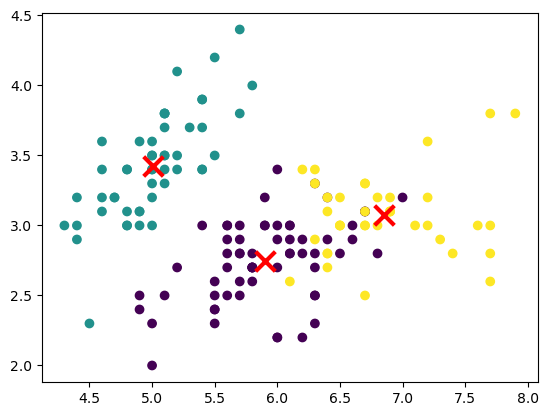

In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)

# Perform k-means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=0).fit(data)

# Get the cluster labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Visualize the results
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=labels)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, linewidths=3, color='r')
plt.show()


In [9]:
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the Titanic dataset
titanic = fetch_openml(name='titanic', version=1)
data = pd.DataFrame(titanic.data, columns=titanic.feature_names)
target = pd.Series(titanic.target)

# Convert non-numeric data to numeric values
data['sex'] = pd.factorize(data['sex'])[0]
data['embarked'] = pd.factorize(data['embarked'])[0]

# Drop irrelevant columns
data = data.drop(['name', 'ticket', 'cabin', 'boat', 'body', 'home.dest'], axis=1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=0)

# Build a kNN classifier with k=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Compute the accuracy of the model on the testing set
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').